
# Model Evaluation: Surface Fitting

In a [previous report](https://github.com/MuhammadVT/ECE5554_final_project/blob/master/build_surface_fit_models.ipynb) we built three surface fitting models (linear interpolation, nearest neighbor, and 2D polynomial fit) and compared their performance. Here we evaluate the ability of the models to predict the pixel error offsets. The resulting distortion maps are shown in addition to summary statistics for select datasets.


In [1]:
#Set Plotting Parameters
%matplotlib inline
%config InlineBackend.figure_format='retina'
import seaborn as sns
###############################################################################
sns.set_style("whitegrid")
f_size=15
sns.set_context(rc = {'axes.facecolor': ".9",
                      'legend.fontsize': f_size,
                      'figure.figsize': (15,5),
                      'figure.titlesize': f_size,
                      'xtick.labelsize': f_size,
                      'ytick.labelsize': f_size,
                      'font.size': f_size,
                      'axes.titlesize': f_size,
                      'axes.labelsize': f_size,
                      'lines.markersize': 10,     
                      'legend.markerscale': 2,     
                      'lines.markeredgewidth': 0.4,
                      'lines.linewidth': 3})
##############################################################################

In [2]:
#Load Packages
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy import stats


#Load Custom Modules
import star_utils
from gen_d_params import gen_d_params
from err_maps import err_maps
from dmap_compare import dmap_compare
from plot_error_maps import plot_error_maps
from star_utils import d2pd,d_all2pd

## Prepare the data

In [6]:
#Load training/test data
#Training data: all stars from 'mx2' image
#Test data: all stars from 'mx3' image
train_set=['mx2']
test_set=['mx3']

d_orig_train = gen_d_params(train_set)
d_orig_test = gen_d_params(test_set)

fit=['linear','nearest','2d polyfit']
order=[None,None,2]
e_maps_linear,d_new_train_linear,d_new_test_linear = err_maps(d_orig_train,d_orig_test,fit[0],order[0])
e_maps_nearest,d_new_train_nearest,d_new_test_nearest = err_maps(d_orig_train,d_orig_test,fit[1],order[1])
e_maps_2dpoly,d_new_train_2dpoly,d_new_test_2dpoly = err_maps(d_orig_train,d_orig_test,fit[2],order[2])

d_params_train=[d_orig_train,d_new_train_2dpoly,d_new_train_nearest,d_new_train_linear]
d_params_test=[d_orig_test,d_new_test_2dpoly,d_new_test_nearest,d_new_test_linear]

d_labels_train=['original','2d polyfit','nearest','linear']
d_labels_test=['original','2d polyfit','nearest','linear']
col=['mag','starname']
data_train = d_all2pd(d_params_train,d_labels_train,cols=col)
data_test = d_all2pd(d_params_test,d_labels_test,cols=col)

## Distortion Maps
The following figures demonstrate the resulting error magnitudes of the Test dataset (all stars in 'MX3' image) after application of the surface fitting error maps created in this [report](http://localhost:8888/notebooks/build_surface_fit_models.ipynb).

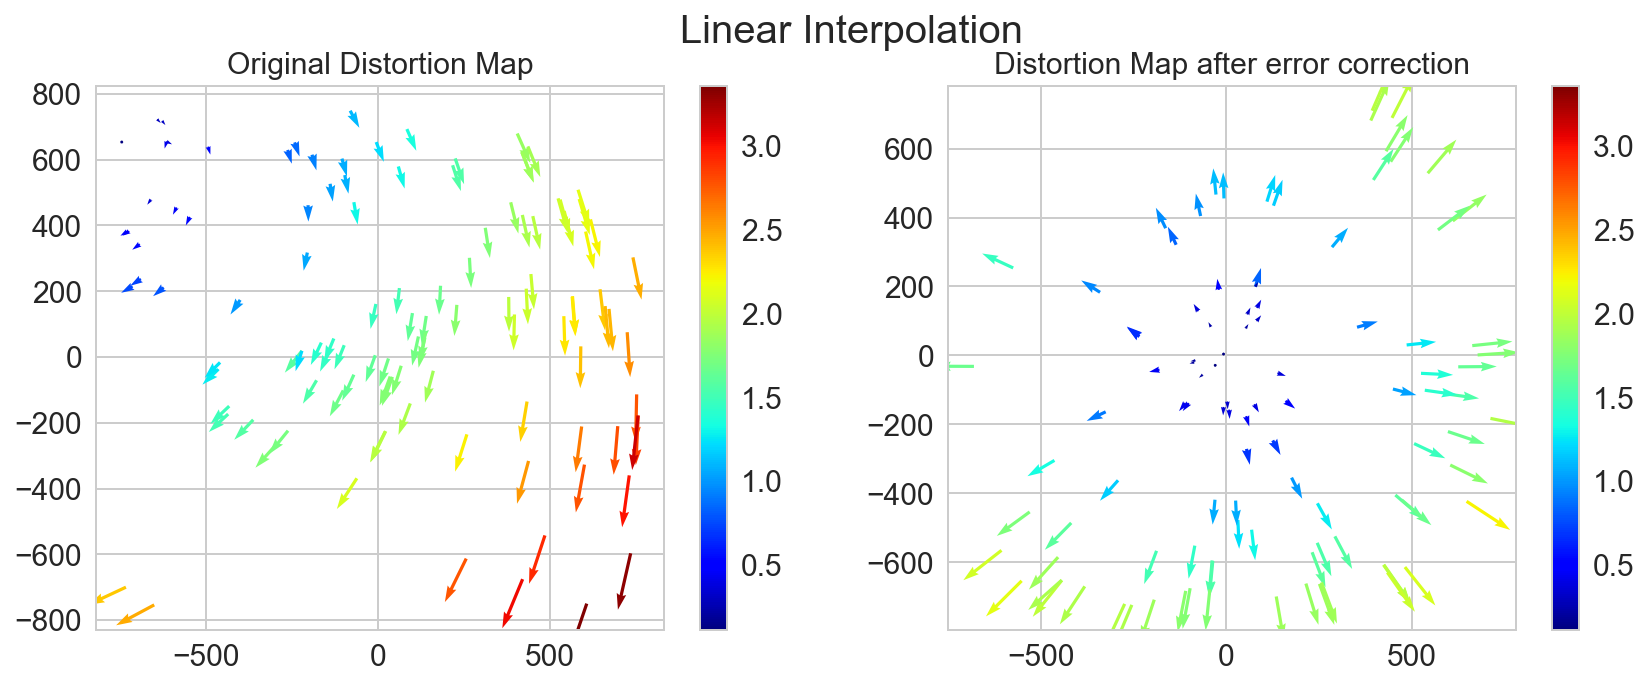

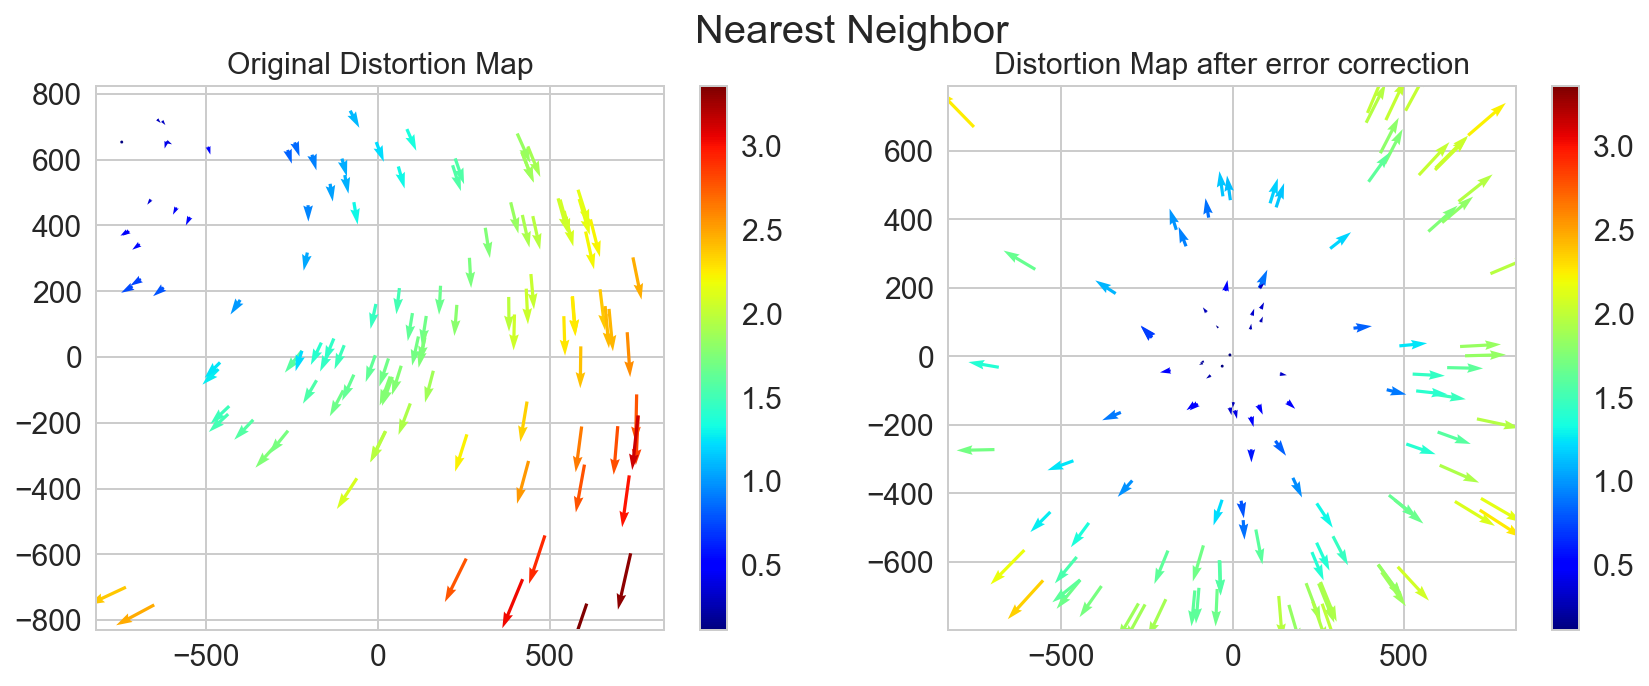

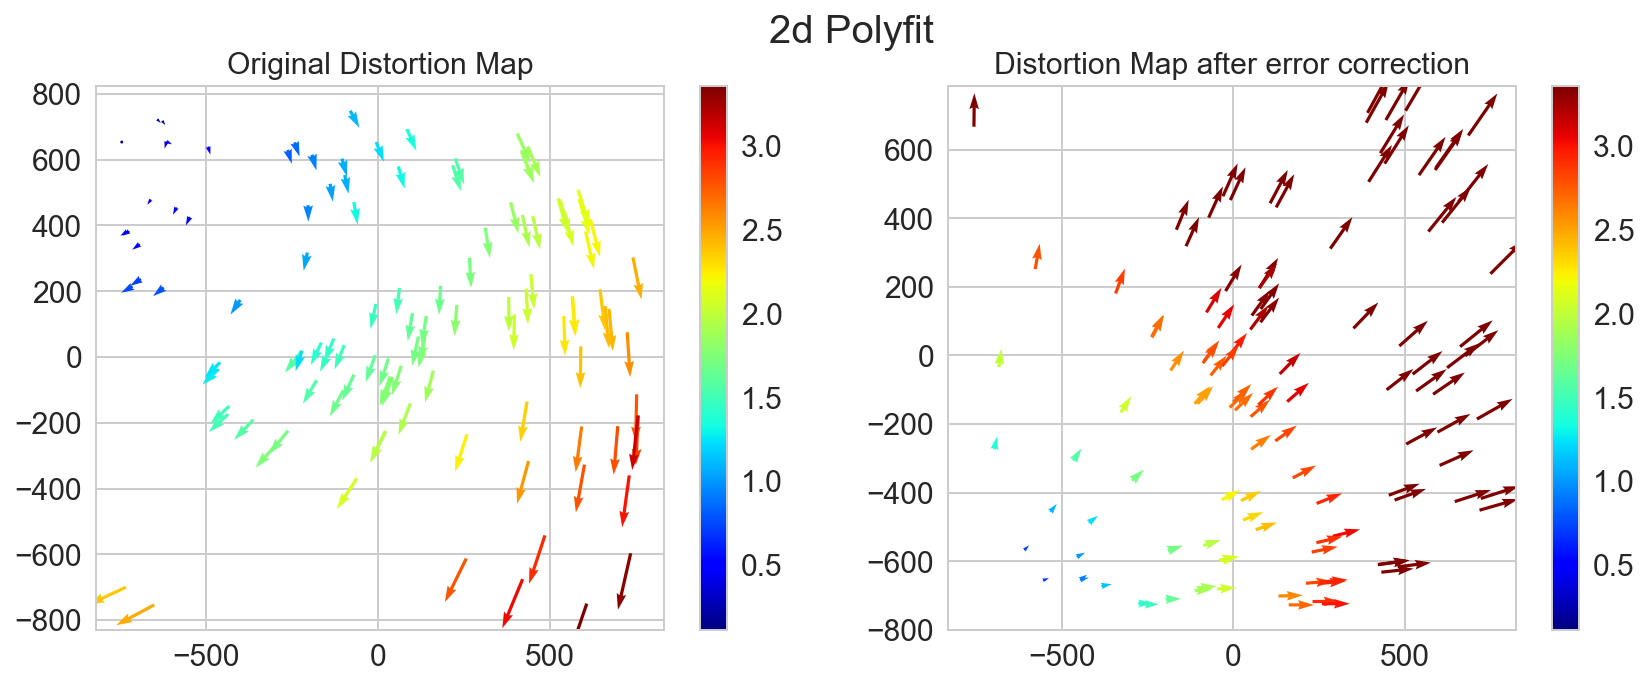

In [8]:
#Plot resulting distortion maps
dmap_compare(d_orig_train,d_orig_test,d_new_train_linear,d_new_test_linear,
            suptitle='Linear Interpolation')
dmap_compare(d_orig_train,d_orig_test,d_new_train_nearest,d_new_test_nearest,
            suptitle='Nearest Neighbor')
dmap_compare(d_orig_train,d_orig_test,d_new_train_2dpoly,d_new_test_2dpoly,
            suptitle='2d Polyfit')

## Error Mapping Stats:
The following figures illustrate the ability of the different modeling techniques to reduce the overall error magnitude.

The first figure shows the results of applying the error model to the training dataset, and the second figure shows the results of applying the error model to the testing dataset.

The linear interpolation seemed decrease the magnitude of errors the best, followed closely by the nearest neighbor search. The 2d polyfitting algorithm actually increased the magnitude of errors and is not included in the following figures


In [20]:
#define plotting function
def plot_stats(data_train,data_test,train_set=['mx2'],test_set=['mx3'],col=['mag']):

    fig = plt.figure(figsize=(15, 5), facecolor='w', edgecolor='k')
    fig.set_tight_layout(False)
    width=0.5
    plt.subplot(121)
    plt.title('Training Data Error Stats\n'+'Train_set='+str(train_set).upper()+' Test_set='+str(train_set).upper())
    ax1=sns.boxplot(data=data_train,order=["mag_original",
                                           "mag_linear",
                                           "mag_nearest"],
                                           width=width)
    ax1.set(ylabel='Error Offset (# of pixels)')
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation=30)

    plt.subplot(122)
    plt.title('Test Data Error Stats\n'+'Train_set='+str(train_set).upper()+' Test_set='+str(test_set).upper())
    ax2=sns.boxplot(data=data_test,order=["mag_original",
                                          "mag_linear",
                                          "mag_nearest"],
                                           width=width)
    ax2.set(ylabel='Error Offset (# of pixels)')
    ax2.set_xticklabels(ax2.get_xticklabels(),rotation=30)

In [21]:
#define function to load data
def load_data(train_set=[],test_set=[]):
    #Load training/test data
    #Training data: all stars from 'mx2' image
    #Test data: all stars from 'mx3' image

    d_orig_train = gen_d_params(train_set)
    d_orig_test = gen_d_params(test_set)

    fit=['linear','nearest']
    order=[None,None,2]
    e_maps_linear,d_new_test_linear,d_new_train_linear = err_maps(d_orig_train,d_orig_test,fit[0],order[0])
    e_maps_nearest,d_new_test_nearest,d_new_train_nearest = err_maps(d_orig_train,d_orig_test,fit[1],order[1])

    d_params_train=[d_orig_train,d_new_train_nearest,d_new_train_linear]
    d_params_test=[d_orig_test,d_new_test_nearest,d_new_test_linear]

    d_labels_train=['original','nearest','linear']
    d_labels_test=['original','nearest','linear']
    col=['mag','starname']
    data_train = d_all2pd(d_params_train,d_labels_train,cols=col)
    data_test = d_all2pd(d_params_test,d_labels_test,cols=col)
    
    return data_train,data_test

## Error Mapping Stats:
The following figures illustrate the ability of the different modeling techniques to reduce the overall error magnitude.

The left plot shows the spread of error magnitudes for the training data while the plot on the right corresponds to the testing dataset. In both plots, the blue boxplot illustrates the spread of all error magnitudes of the original image or set of images included in the respective dataset.  The green boxplots correspond to the result after linear interpolation, and the red boxplots correspond to the resulting error magnitudes after application of the nearest neighbor algorithm.  The performance of the 2D Polynomial fitting algorithm is significantly worse than the other two methods and is not included in the results. 

## Using 'PX3' image as training data:
It is seen from the following figures that using all the stars in the 'PX3' image as a training set improves the centroid location of the stars in the 'PX2' image. The linear interpolation approach appears to decrease the mean of the absolute pixel error by approximately 0.7 pixels.

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


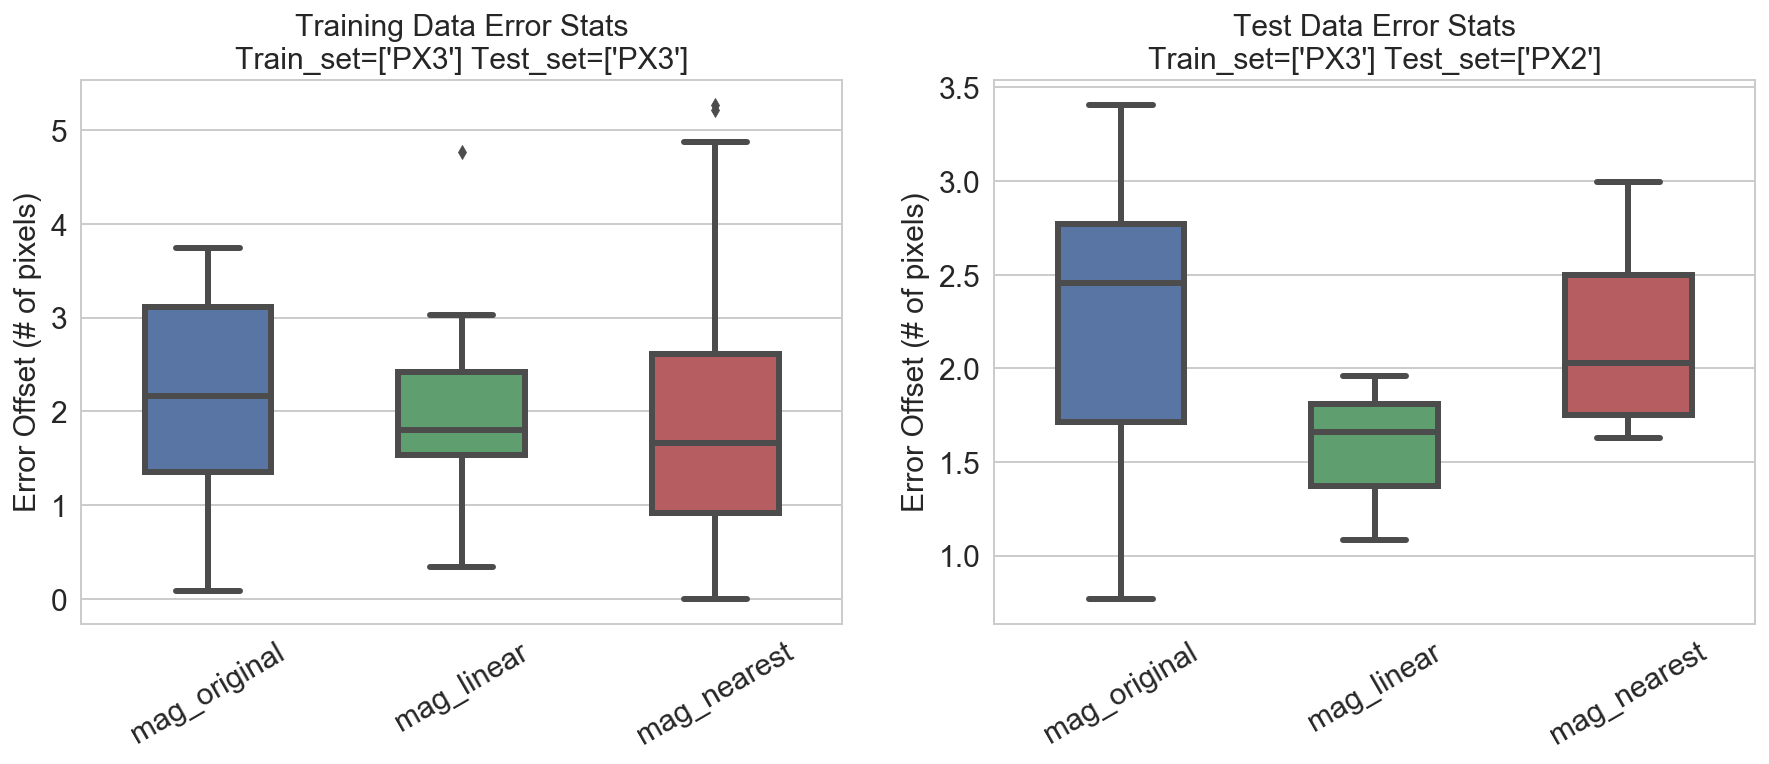

In [19]:
train_set=['px3']
test_set=['px2']
data_train,data_test=load_data(train_set=train_set,test_set=test_set)
plot_stats(data_train,data_test,train_set=train_set,test_set=test_set,col=['mag','starname'])

## Using 'MX3' image as training data:
It is seen from the following figures that using all the stars in the 'MX3' image improves the centroid location of the stars in the 'MX2' image. The nearest neighbor approach appears to decrease the mean of the absolute pixel error by approximately 0.7 pixels. 

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


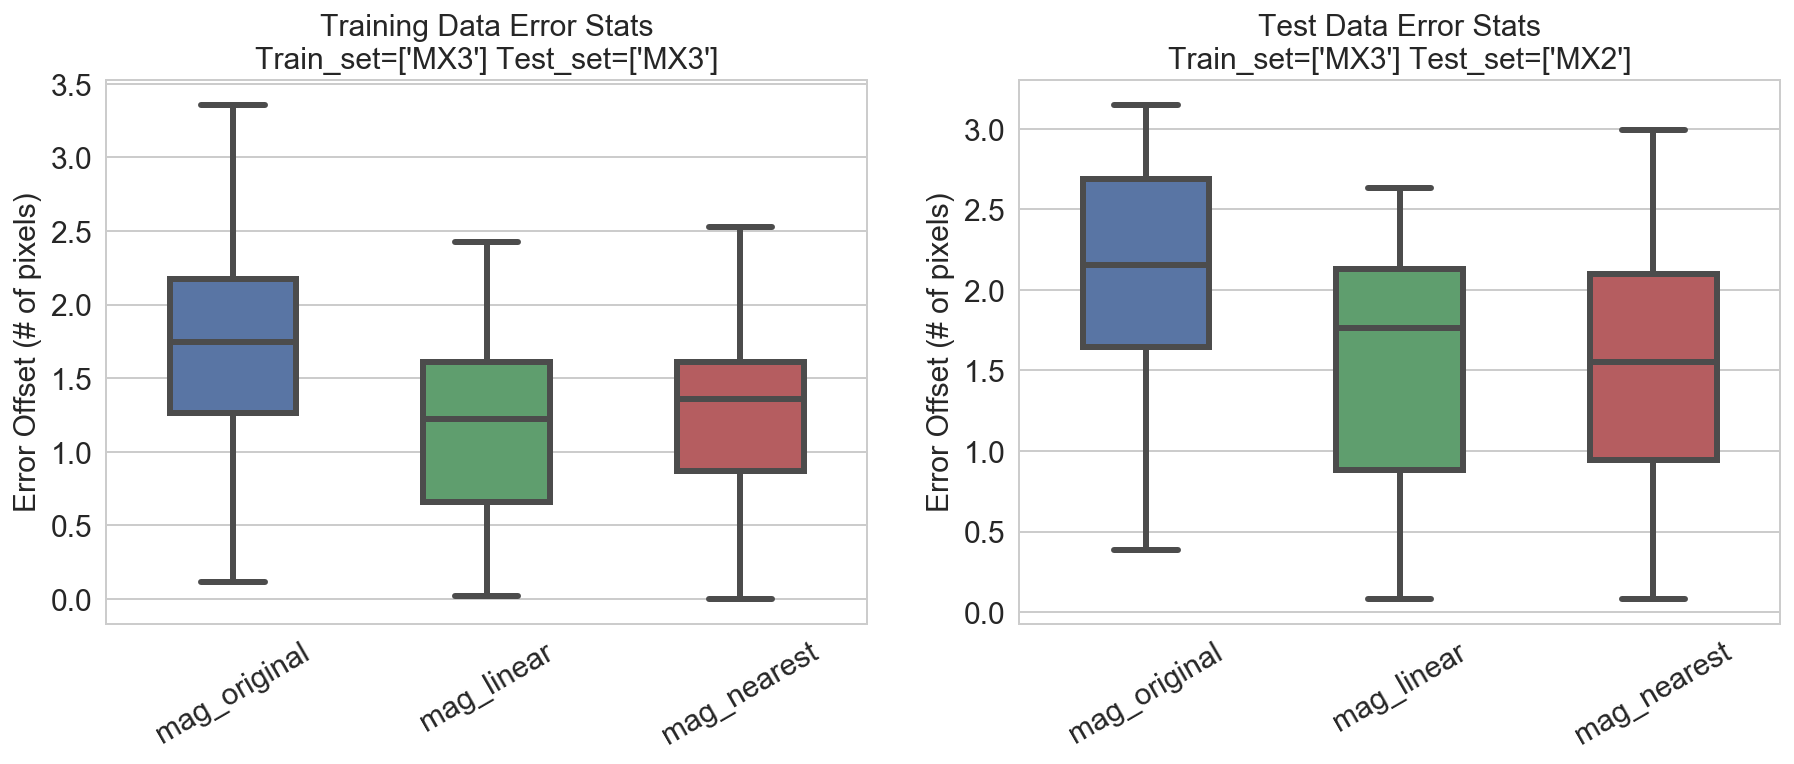

In [18]:
train_set=['mx3']
test_set=['mx2']
data_train,data_test=load_data(train_set=train_set,test_set=test_set)
plot_stats(data_train,data_test,train_set=train_set,test_set=test_set,col=['mag','starname'])